<a href="https://colab.research.google.com/github/ooootaaaa/DeepLearning2022Late/blob/main/1024%5BFashionMNIST2022%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ファッション画像(MNISTデータ)の画像認識

##データの読み込み

In [17]:
from __future__ import absolute_import, division, print_function, unicode_literals
#KerasとTensorFlowを読み込む
import tensorflow as tf
from tensorflow import keras

##ファッションMNIST

https://github.com/zalandoresearch/fashion-mnist

In [18]:
 fashion_mnist = keras.datasets.fashion_mnist
 #データ読み込み
 (train_images, train_labels),(test_images,test_labels) = fashion_mnist.load_data()

###分類用の変数を定義する

* 0    T-shirt/top
* 1    Trouser
* 2    Pullover
* 3    Dress
* 4    Coat
* 5    Sandal
* 6    Shirt
* 7    Sneaker
* 8    Bag
* 9    Ankle boot


In [19]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker',' Bag','Ankle boot']
print(class_names[3])#リストの中身を確認

Dress


###読み込んだデータの確認

In [20]:
#train_images, test_imagesの形を確認
print(train_images.shape) #学習用画像のデータ
print(test_images.shape) #テスト検証用画像のデータ
print(train_labels.shape) #学習用答えデータ(ラベル)の形
print(train_labels)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
[9 0 0 ... 3 0 5]


###画像データを表示

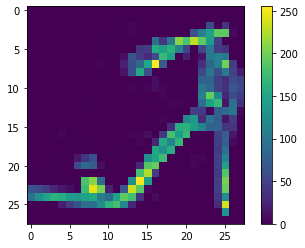

In [21]:
#学習画像の先頭を確認
#matplotlibのpyplotを読み込む
import matplotlib.pyplot as plt
#numpyを読み込む
import numpy as np

plt.figure()
plt.imshow(train_images[8])#9番のアンクルブーツ
plt.colorbar()
plt.grid(False)
plt.show() #表示

###データを256段階に整形

In [22]:
train_images = train_images /255.0
test_images = test_images / 255.0

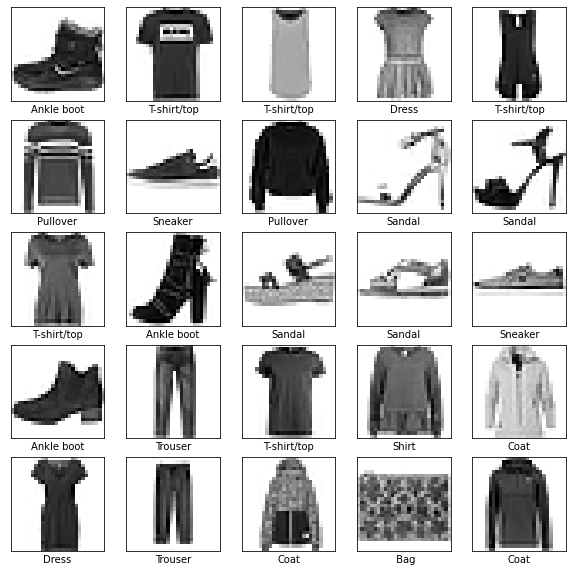

In [23]:
#整形後のデータを表示
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
#ループ終わり
plt.show()

###学習モデルを組み立てる

###層(レイヤー)を追加設定していく

In [24]:
from tensorflow.python.ops.array_ops import inplace_update_eager_fallback
#kerasの学習モデルに層を設定
model = tf.keras.Sequential()
#入力データを整形(28*28が1画像の１次元データに整形)
model.add(tf.keras.layers.
          Flatten(input_shape=(28,28)))
#パーセプトロンの層追加(Dence)
model.add(tf.keras.layers.Dense(128,activation='relu'))
#２つ目の層を追加(Dense)
model.add(tf.keras.layers.Dense(10))

###学習モデルをコンパイル

In [25]:
#学習モデルをコンパイル
#オプティマイザー=adam(損失をみて学習パラメータを更新する方法)
#損失関数＝クロスエントロピー(正解率の計算方法)
#指標 accuracy(正解率) 学習状況の監視の基準
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#出来上がった学習モデルでサンプルデータを学習する

In [26]:
#学習する
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4963 - accuracy: 0.8245
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3733 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3356 - accuracy: 0.8781
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3094 - accuracy: 0.8874
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2946 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2814 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2679 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2582 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2476 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.237

###学習したモデルを評価検証する

In [27]:
#学習していないデータ(test_images&tes_labels)で学習度合いを評価検証する
test_loss,test_acc = model.evaluate(test_images, test_labels,verbose=2)
#評価結果の戻り値のうち、精度を表示する
print('精度 accuracy：',test_acc)

313/313 - 1s - loss: 0.3446 - accuracy: 0.8819 - 788ms/epoch - 3ms/step
精度 accuracy： 0.8819000124931335


###学習モデルで予測させる

In [28]:
#学習モデルで予測させる
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
#予測モデルの予測結果を受け取る
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


###予測結果を確認

In [37]:
#予測結果の形を確認
print(predictions.shape)
#先頭行を確認
print(predictions[0])
#一番高い確率を確認
print(np.argmax(predictions[0]))
print(predictions[0][9])
#testの先頭データは何か確認(予測が正解したか？)
print(test_labels[0])
print(class_names[test_labels[0]])

(10000, 10)
[4.7116716e-10 1.0362904e-11 6.3598640e-11 1.4621190e-09 2.3790714e-10
 2.7029417e-04 8.4903604e-09 5.4572448e-03 4.5525090e-09 9.9427241e-01]
9
0.9942724
9
Ankle boot


###個別の予測結果をグラフィカルに表示するための関数を準備する

###画像と結果の値を表示する関数

In [57]:
def plot_image(i,predictions_array, true_label, img):
  true_label, img =true_label[i] ,img[i]
  #pyplotの設定
  plt.grid(False)#グリッドなし
  plt.xticks([])#x刻みなし
  plt.yticks([])#y刻みなし
  plt.imshow(img,cmap=plt.cm.binary)#画像(img)を白黒表示で設定
  #予測結果の文字列表示部分
  #予測の配列のうち、一番高い確率といわれているものを抜き出して代入
  predicted_label = np.argmax(predictions_array)
  #予測が正解ラベルと同じかどうかを判定
  if predicted_label == true_label:
    color = 'blue'#予測が正解の時は青色で表示
  else:
    color = 'red'#予測が不正解の時は赤色で表示
  #if文終わり

  #plotに横タイトルを設定
  #予測商品名、予測確立、正解商品名の順に表示
    plt.xlabels("{} {:2.0f}% ({})".format(
      class_names[predicted_label],
      100*np.max(predictions_array),
      class_names[true_label]),color=color
    )
#関数終わり

###予測と正解の値を棒グラフで表示する関数

In [62]:
def plt_value_array(i,predictions_array,true_label):
  true_label = true_label[i]
   #pyplotの設定
  plt.grid(False)#グリッドなし
  plt.xticks(range(10))#x刻み　0～9
  plt.yticks()#y刻みなし
  #棒を設定　棒を10刻みでpredictions_arrayの数分、グレー表示
  thisplot = plt.bar(range(10),predictions_array, color='#777777')
  plt.ylim([0,1])
  #正解、不正解野棒をグレーから色を変える
  predicted_label = np.argmax(predictions_array)
  #予測の棒は赤に変える
  thisplot[predicted_label].set_color('red')
  #正解の棒は青に変える(赤い予測も青に変わる)
  thisplot[true_label].set_color('blue')
  #関数終わり

###作成した関数を使って予測と正解をグラフィカル表示する

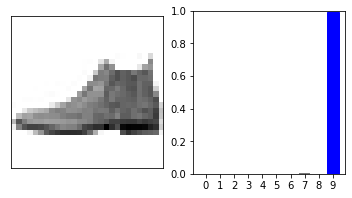

In [63]:
#0番目の画像を確認
i=0
#plotを設定
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
#画像とタイトルを関数表示
#i=0, predictons[0]=1万件分の予測の0番目=10個の確立の配列
#test_labels=1万件の正解配列、test_images=1万件分の評価画像データ
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)#隣にサブプロット
#予測結果を関数で棒グラフ表示
plt_value_array(i,predictions[i],test_labels)
plt.show() #最後に表示